# <p style="text-align: center;">Representaciones gr√°ficas de datos</p>
## <p style="text-align: center;">Ejercicios con Matplotlib (y Pandas)</p>



In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math


1) Escribe una funci√≥n que reciba un dataframe de Pandas con los ingresos y gastos 
de una empresa por meses durante un a√±o, y devuelva un diagrama de l√≠neas con 
dos l√≠neas, una para los ingresos y otra para los gastos. El diagrama debe tener una 
leyenda identificando la l√≠nea de los ingresos y la de los gastos, un t√≠tulo con el 
nombre ‚ÄúEvoluci√≥n de ingresos y gastos‚Äù y el eje y debe empezar en 0. Genera datos 
aleatorios para probar el funcionamiento.

In [30]:
data = {
    "Mes": ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    "Ingresos": [12000, 15000, 13000, 14000, 16000, 17000, 15500, 16500, 15800, 17500, 16200, 18000],
    "Gastos": [8000, 9000, 8500, 8700, 9200, 9100, 8800, 8900, 9400, 9500, 9700, 9900]
}
datos = pd.DataFrame(data)
def ingresosYGastos(datos):
    meses = datos['Mes']
    ingresos = datos['Ingresos']
    gastos = datos['Gastos']
    plt.figure(figsize=(12, 4))
    plt.plot(meses, ingresos, color='blue', label='Ingresos')
    plt.plot(meses, gastos, color='red', label='Gastos')
    plt.legend(['Ingresos', 'Gastos'], loc='upper left')
    plt.title("Evoluci√≥n de ingresos y gastos")
    plt.grid(True)  
    plt.ylim(0)
    plt.show()
    
ingresosYGastos(datos)
    
    

2) Escribe una funci√≥n que reciba una **serie** de Pandas con las notas de los alumnos 
de un m√≥dulo cualquiera (generadas aleatoriamente o inventadas) y devuelva un 
diagrama de caja. El diagrama debe tener el t√≠tulo ‚ÄúDistribuci√≥n de notas‚Äù. Luego 
debes conseguir pasarle un dataframe con las notas de 4 m√≥dulos diferentes y, en
la misma zona, mostrar las cajas de la distribuci√≥n de los 4 m√≥dulos.

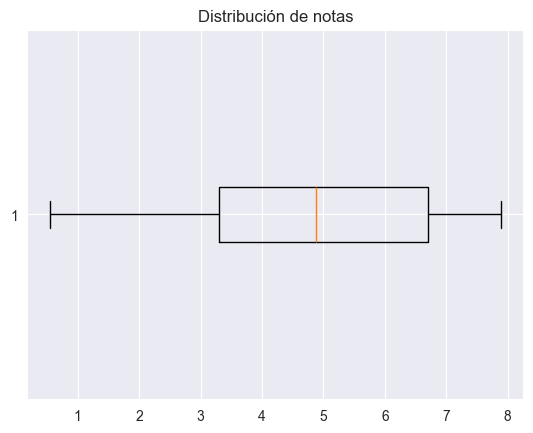

In [31]:
np.random.seed(40)
nombres_alumnos = ["Ana", "Luis", "Carlos", "Mar√≠a", "Jorge", "Sof√≠a", "Pedro", "Elena", "Manuel", "Clara"]
notas = np.random.uniform(0, 10, len(nombres_alumnos))  

serie_notas = pd.Series(data=notas, index=nombres_alumnos, name="Notas del M√≥dulo")

serie_notas = serie_notas.round(2)

def notasAlumno(serie_notas):
    if isinstance(serie_notas, (pd.DataFrame, pd.Series)):
        plt.boxplot(serie_notas, vert=False)
        plt.title("Distribuci√≥n de notas")
        plt.show()
    
    
notasAlumno(serie_notas)

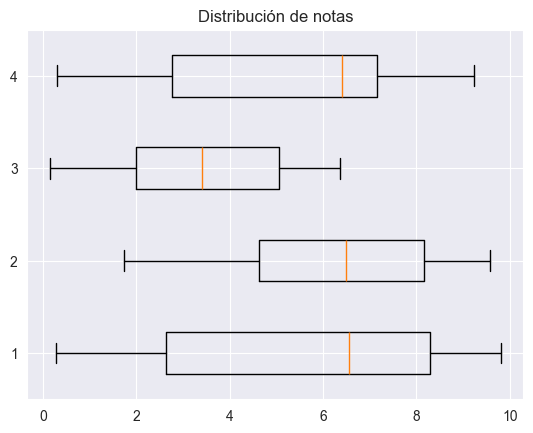

In [32]:
nombres_alumnos = ["Ana", "Luis", "Carlos", "Mar√≠a", "Jorge", "Sof√≠a", "Pedro", "Elena", "Manuel", "Clara"]
modulos = ["Matem√°ticas", "Historia", "F√≠sica", "Qu√≠mica"]

# Generar un DataFrame con notas aleatorias entre 0 y 10
notas = {modulo: np.random.uniform(0, 10, len(nombres_alumnos)) for modulo in modulos}

# Crear el DataFrame
df_notas = pd.DataFrame(notas, index=nombres_alumnos)

# Redondear las notas a 2 decimales
df_notas = df_notas.round(2)

def notasAlumno4Modulos(df_notas):
    plt.boxplot(df_notas, vert=False)
    plt.title("Distribuci√≥n de notas")
    plt.show() 

notasAlumno(df_notas)

3) Dispones de datos sobre las edades de pacientes en un estudio de predicci√≥n de 
enfermedades card√≠acas, para ello debes generar un conjunto de datos simulado 
con 500 edades entre 20 y 80 a√±os, siguiendo una distribuci√≥n normal. Crea un 
histograma para visualizar la distribuci√≥n de las edades e identifica posibles sesgos, 
si los hay. Ponle un formato visualmente m√°s agradable que el est√°ndar.

In [33]:
np.random.seed(42)  
edades_normales = np.random.normal(loc=50, scale=15, size=500)  
edades_normales = np.clip(edades_normales, 20, 80).astype(int)  # clip hace que si hay edades desorbitadas se normalizen

df = pd.DataFrame(edades_normales, columns=["Edad"])

# Crear un histograma con formato visual mejorado
plt.figure(figsize=(10, 6))
plt.hist(df["Edad"], bins=10, edgecolor="white")
plt.title("Distribuci√≥n de Edades de Pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.6)

plt.show()

4) El fichero titanic.csv contiene informaci√≥n sobre los pasajeros del Titanic. Vamos a 
explorar su informaci√≥n mediante representaciones gr√°ficas, para ello, crea un 
dataframe con Pandas a partir del CSV, luego, debes generar las siguientes 
representaciones independientes (pon t√≠tulo a todas, as√≠ como a los ejes X e Y, 
intenta cuidar el aspecto de la visualizaci√≥n): <br>
a) Diagrama de sectores con los fallecidos y supervivientes. <br>
b) Histograma con las edades. <br>
c) Diagrama de barras con el n√∫mero de personas en cada clase. <br>
d) Diagrama de barras con el n√∫mero de personas fallecidas y supervivientes en  
cada clase. <br>
e) Diagrama de barras con el n√∫mero de personas fallecidas y supervivientes  
acumuladas en cada clase. <br>

In [40]:
df = pd.read_csv("C:/Users/ESP/Desktop/ProgramacionIA/UD3/csvs/titanic.csv")
# diagrama de sectores 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

axes[0, 0].pie(df['Survived'].value_counts(), labels=['Fallecidos','Supervivientes'], wedgeprops={'edgecolor': 'black'})
axes[0, 0].set_title('Fallecidos y supervivientes')

# Histograma con las edades
axes[0, 1].hist(df["Age"], bins=10, edgecolor="white")
axes[0, 1].set_title('Distribuci√≥n de Edades')

# Diagrama de barras con el n√∫mero de personas en cada clase.
clases = df['Pclass'].value_counts()
axes[0, 2].bar(range(len(clases)), height=clases, edgecolor="white", width=0.4,)
axes[0, 2].set_title('Personas en cada clase')

# Diagrama de barras con el n√∫mero de personas fallecidas y supervivientes en cada clase.
grouped = df.groupby(['Pclass', 'Survived']).size().unstack()
fallecidos = grouped[0]  
supervivientes = grouped[1]
clases = fallecidos.index 

axes[1, 0].bar(clases + 0.2, fallecidos, width=0.4, label='Fallecidos', color='red')
axes[1, 0].bar(clases - 0.2, supervivientes, width=0.4, label='Supervivientes', color='green')
axes[1, 0].set_title('Personas fallecidas y supervivientes por clase')
# desactiva la celda de las posiciones del axes
axes[1, 1].axis('off')

# Diagrama de barras con el n√∫mero de personas fallecidas y supervivientes en cada clase.
grouped = df.groupby(['Pclass', 'Survived']).size().unstack()
fallecidos = grouped[0]  
supervivientes = grouped[1]  
clases = fallecidos.index 

axes[1, 2].bar(clases, fallecidos, width=0.4, label='Fallecidos', color='red')
axes[1, 2].bar(clases, supervivientes, bottom=fallecidos, width=0.4, label='Supervivientes', color='green')
axes[1, 2].set_title('Personas fallecidas y supervivientes por clase (acumulado)')


plt.show()

5) Durante el entrenamiento de una red neuronal, se registr√≥ la p√©rdida (loss) en cada 
una de las 50 √©pocas usadas. Simula estos valores usando una funci√≥n exponencial 
decreciente. Representa la evoluci√≥n de la p√©rdida en un gr√°fico de l√≠neas y destaca 
la tendencia general. Se adjunta modelo de referencia de la exponencial decreciente, 
donde x es la √©poca:
<p style="text-align: center;">ùë¶(ùë•) = ùëí‚àí0.1¬∑x</p>

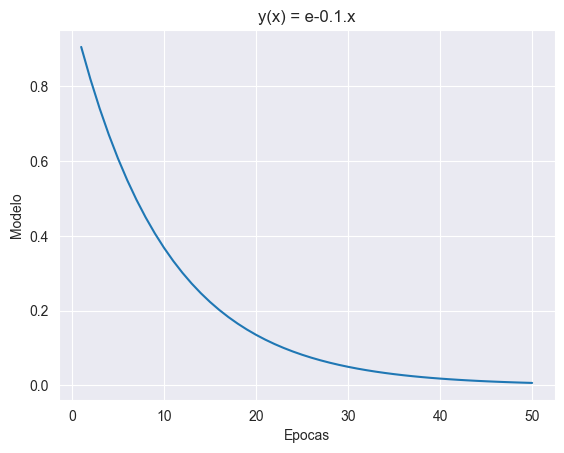

In [52]:
perdida = np.arange(1,51)
formula = np.power(math.e, -0.1*perdida)

plt.title(f'y(x) = e-0.1.x')
plt.xlabel('Epocas')
plt.ylabel("Modelo")
plt.plot(perdida, formula)
plt.show()